<a href="https://www.kaggle.com/code/chandansingh98/heart-failure-prediction-99-2-accuracy?scriptVersionId=178476403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
            
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
df.shape

(5000, 13)

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


<Axes: >

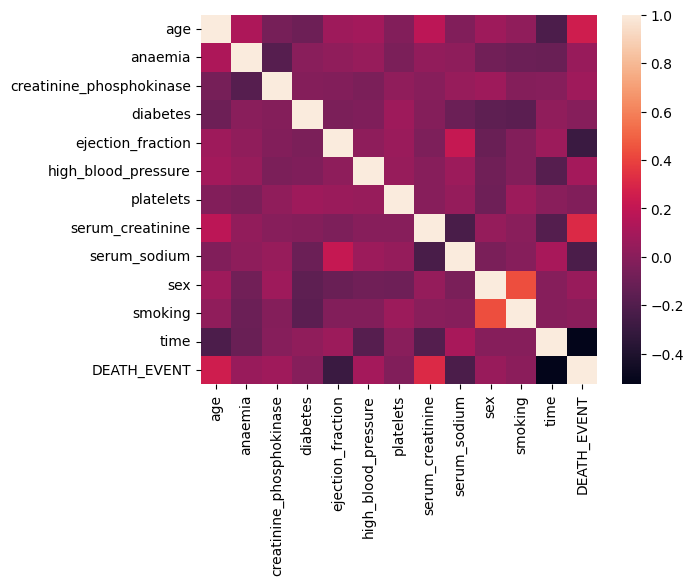

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


# Exploratory Data Analysis

# 1. Age

<Axes: ylabel='Density'>

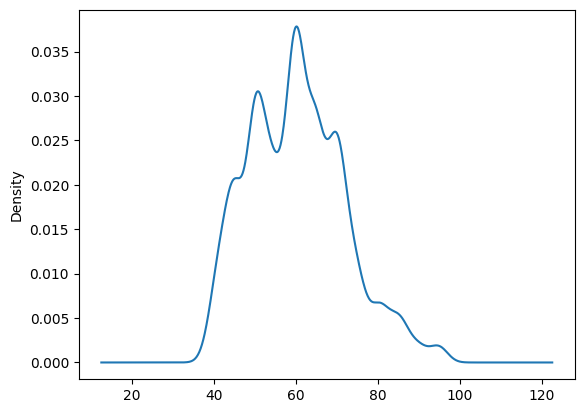

In [8]:
df['age'].plot(kind = 'kde')

In [9]:
df['age'].skew()

0.45081168033242247

<Axes: >

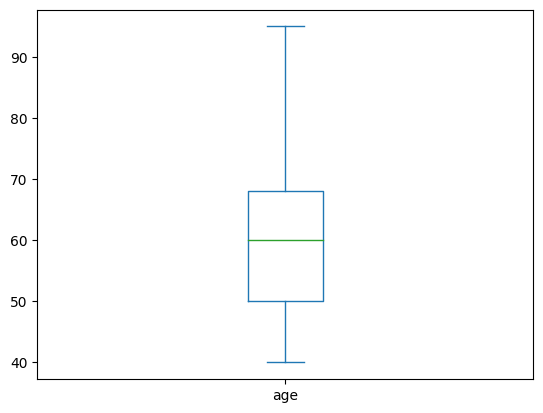

In [10]:
df['age'].plot(kind = 'box')

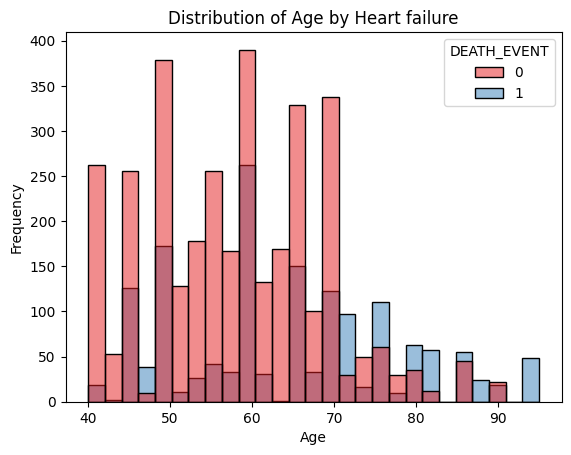

In [11]:
sns.histplot(data=df, x='age', hue='DEATH_EVENT', palette='Set1', kde=False)

plt.title('Distribution of Age by Heart failure')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* The age column is normally distributed.
* There is a slight trend that as the height increases the rate of heartfaliure also increases.

# 2. Anaemia

In [12]:
df['anaemia'].value_counts()

anaemia
0    2628
1    2372
Name: count, dtype: int64

In [13]:
pd.crosstab(df['DEATH_EVENT'], df['anaemia'],  normalize = 'columns') * 100

anaemia,0,1
DEATH_EVENT,,
0,71.042618,65.978078
1,28.957382,34.021922


**Conclusion:**
* Data shows mild trend as per which patients having anaemia are more prone to hear attacks.

# 3. Creatinine Phosphokinase

<Axes: ylabel='Density'>

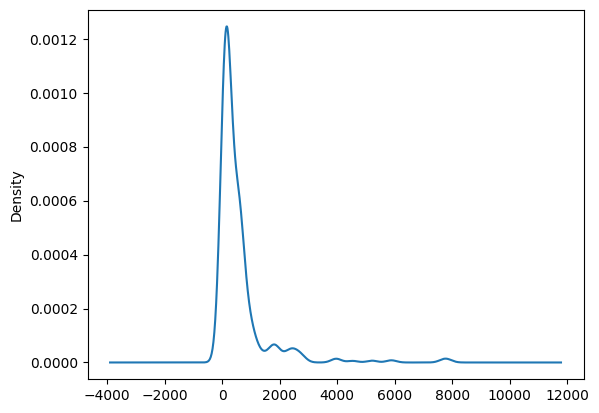

In [14]:
df['creatinine_phosphokinase'].plot(kind = 'kde')

In [15]:
df['creatinine_phosphokinase'].skew()

4.403444256118772

<Axes: >

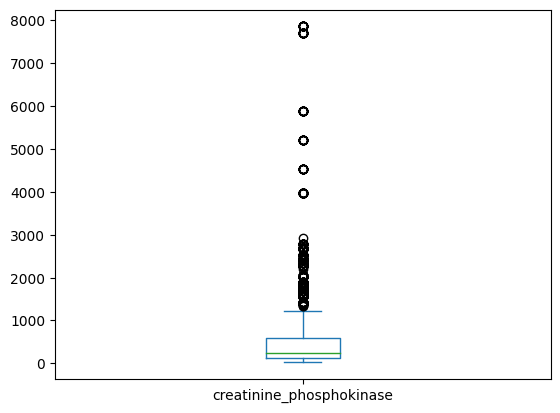

In [16]:
df['creatinine_phosphokinase'].plot(kind = 'box')

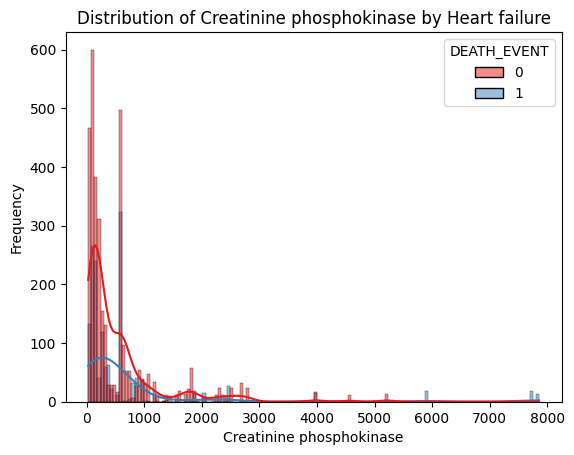

In [17]:
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', palette='Set1', kde=True)

plt.title('Distribution of Creatinine phosphokinase by Heart failure')
plt.xlabel('Creatinine phosphokinase')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Data is right skewed and contains outliers.
* There is a weak relation between heart faliure and creatine phosphokinase.

# 4. Diabetes

In [18]:
df['diabetes'].value_counts()

diabetes
0    2803
1    2197
Name: count, dtype: int64

In [19]:
pd.crosstab(df['DEATH_EVENT'], df['diabetes'], normalize = 'columns')

diabetes,0,1
DEATH_EVENT,,
0,0.68177,0.692308
1,0.31823,0.307692


**Conclusion:**
* According to my domain knowledge diabitic patients are more prone to heart disease but according to the data Diabetes has no effect on heart faliure.

# 5. Ejection Fraction

<Axes: ylabel='Density'>

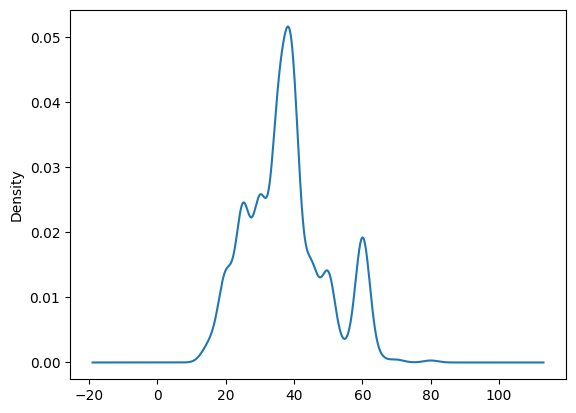

In [20]:
df['ejection_fraction'].plot(kind = 'kde')

In [21]:
df['ejection_fraction'].skew()

0.4944047809955734

<Axes: >

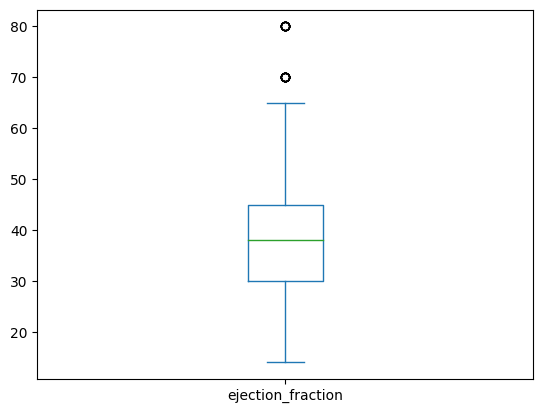

In [22]:
df['ejection_fraction'].plot(kind = 'box')

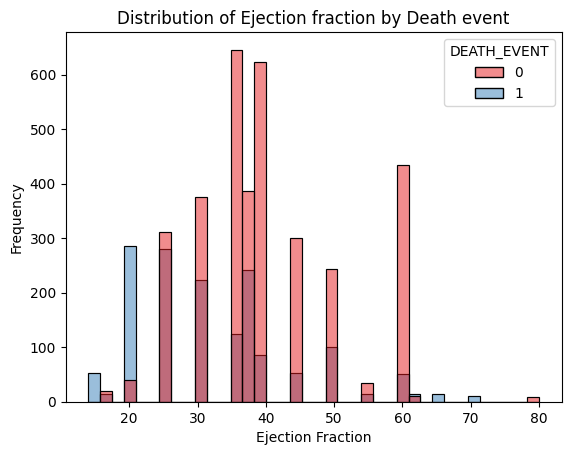

In [23]:
sns.histplot(data = df, x = 'ejection_fraction', hue='DEATH_EVENT', palette='Set1', kde=False)

plt.title('Distribution of Ejection fraction by Death event')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Ejection fraction column is normally distributed with some outliers in it.
* According to my domain knowledge the ejection fraction of healthy heart should be in between 55% - 70%, and the above visualization validates this.

# 6. High Blood Pressure

In [24]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    3176
1    1824
Name: count, dtype: int64

In [25]:
pd.crosstab(df['DEATH_EVENT'], df['high_blood_pressure'], normalize = 'columns') * 100

high_blood_pressure,0,1
DEATH_EVENT,,
0,71.945844,62.883772
1,28.054156,37.116228


**Conclusion:**
* The class distribution is unbalanced.
* It can be seen that the patients having high blood pressure are more prone to heart faliure.

# 7. Platelets

<Axes: ylabel='Density'>

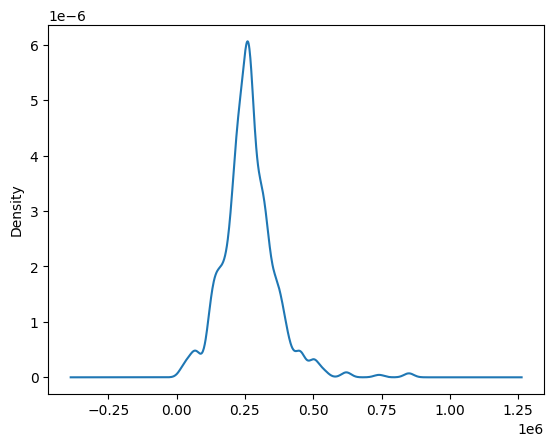

In [26]:
df['platelets'].plot(kind = 'kde')

In [27]:
df['platelets'].skew()

1.157117070165634

<Axes: >

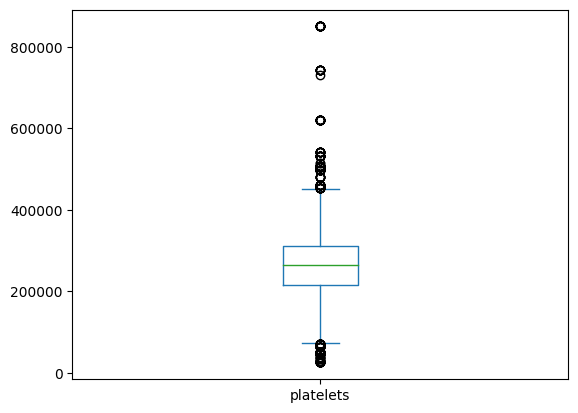

In [28]:
df['platelets'].plot(kind = 'box')

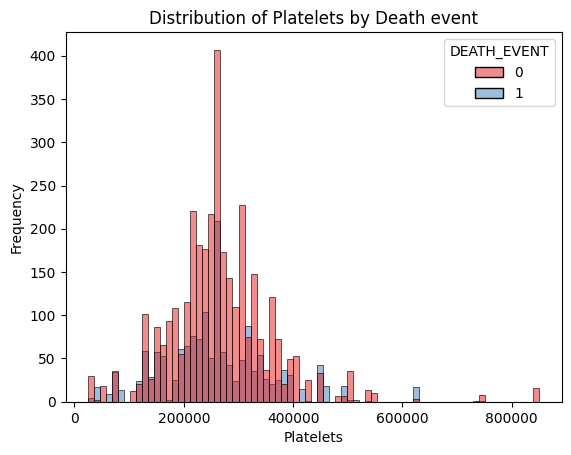

In [29]:
sns.histplot(data = df, x = 'platelets', hue='DEATH_EVENT', palette='Set1', kde=False)

plt.title('Distribution of Platelets by Death event')
plt.xlabel('Platelets')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Platelets column is slightly right skewed.
* It contains outliers.
* Histogram plot shows mild trend that people having platelets more than 300000 have more risk of heart faliure.

# 8. Serum Creatinine

<Axes: ylabel='Density'>

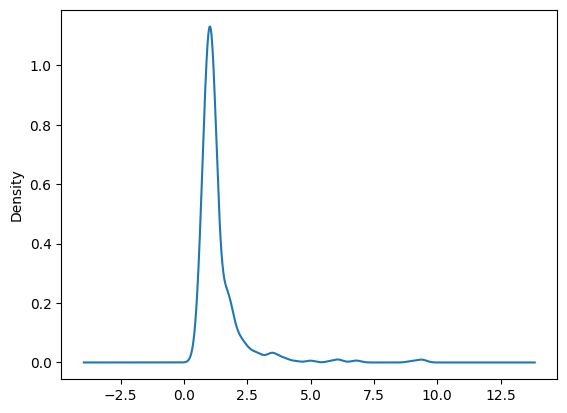

In [30]:
df['serum_creatinine'].plot(kind = 'kde')

In [31]:
df['serum_creatinine'].skew()

4.615903417419207

<Axes: >

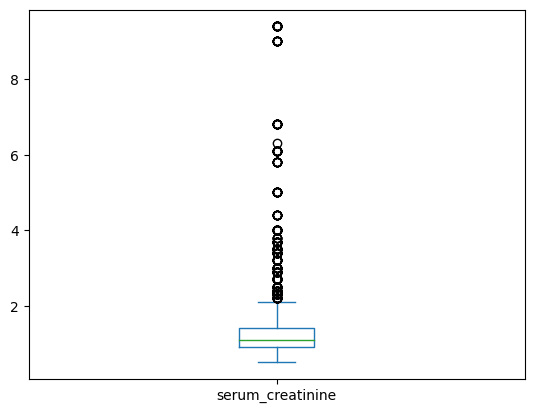

In [32]:
df['serum_creatinine'].plot(kind = 'box')

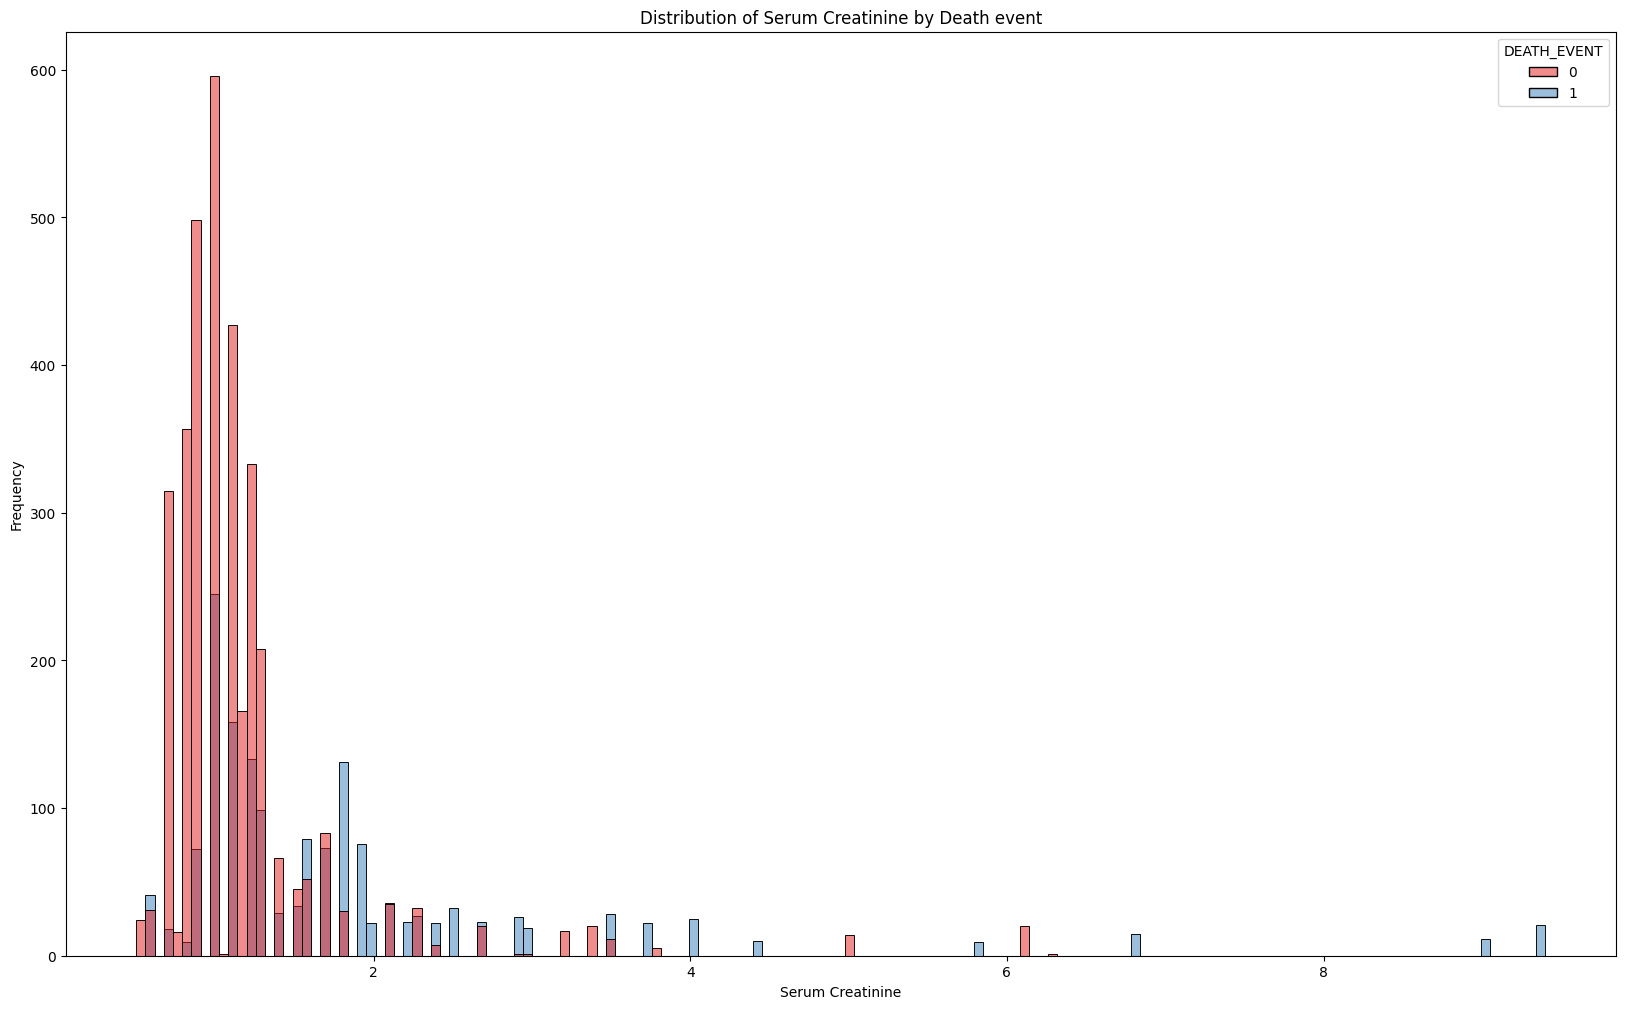

In [33]:
plt.figure(figsize=(20, 12))
sns.histplot(data = df, x = 'serum_creatinine', hue='DEATH_EVENT', palette='Set1', kde=False)

plt.title('Distribution of Serum Creatinine by Death event')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Serum Creatinine colum is right skewed with large number of outliers.
* The serum creatinine level of person with healthy heart is 0.7 - 1.3 mg/dl which is being validated from the histogram.

# 9. Serum Sodium

<Axes: ylabel='Density'>

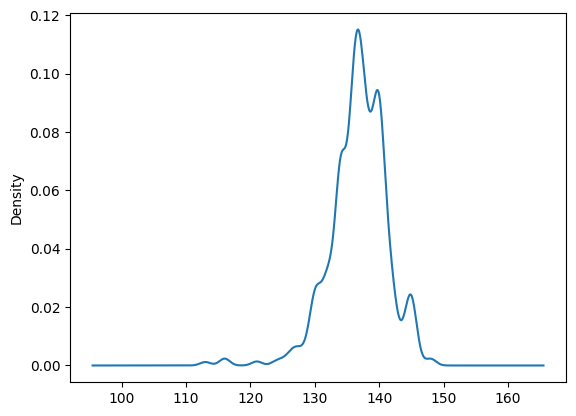

In [34]:
df['serum_sodium'].plot(kind = 'kde')

In [35]:
df['serum_sodium'].skew()

-0.997974578554996

<Axes: >

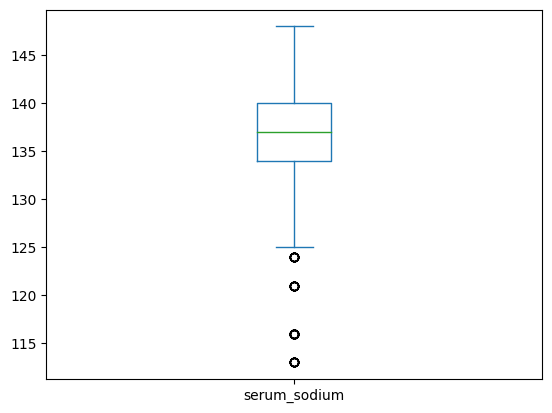

In [36]:
df['serum_sodium'].plot(kind = 'box')

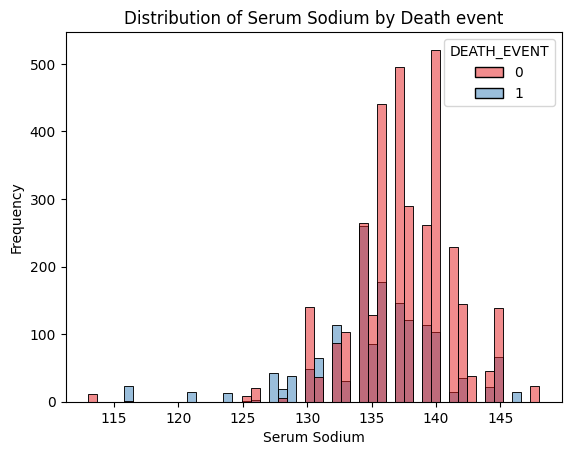

In [37]:
sns.histplot(data = df, x = 'serum_sodium', hue='DEATH_EVENT', palette='Set1', kde=False)

plt.title('Distribution of Serum Sodium by Death event')
plt.xlabel('Serum Sodium')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* The distribution of serum sodium column is slightly left skewed and have some number of outliers.
* From the histogram it is evident that that patients having sodium serum level less than 135 have higher risk of heart faliure.

# 9. Sex

In [38]:
df['sex'].value_counts()

sex
1    3228
0    1772
Name: count, dtype: int64

In [39]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [40]:
pd.crosstab(df['DEATH_EVENT'], df['sex'], normalize = 'columns') * 100

sex,0,1
DEATH_EVENT,,
0,72.121896,66.728625
1,27.878104,33.271375


**Conclusion:**
* Sex column is imbalanced.
* It can be seen from the data than women are more prone to heart faliure than man.

# 10. Smoking

In [41]:
df['smoking'].value_counts()

smoking
0    3441
1    1559
Name: count, dtype: int64

In [42]:
pd.crosstab(df['DEATH_EVENT'], df['smoking'], normalize = 'columns') * 100

smoking,0,1
DEATH_EVENT,,
0,68.93345,67.992303
1,31.06655,32.007697


**Conclusion:**
* It seems like smoking has no effect on heart faliure.

# 11. Time

<Axes: ylabel='Density'>

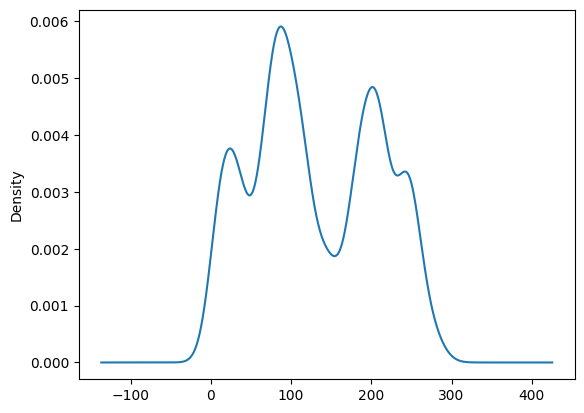

In [43]:
df['time'].plot(kind = 'kde')

In [44]:
df['time'].skew()

0.11498892481750181

<Axes: >

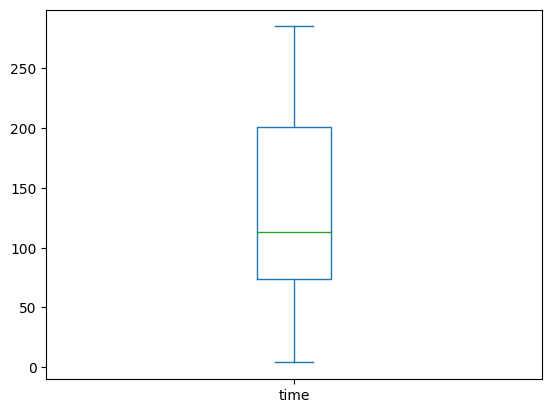

In [45]:
df['time'].plot(kind = 'box')

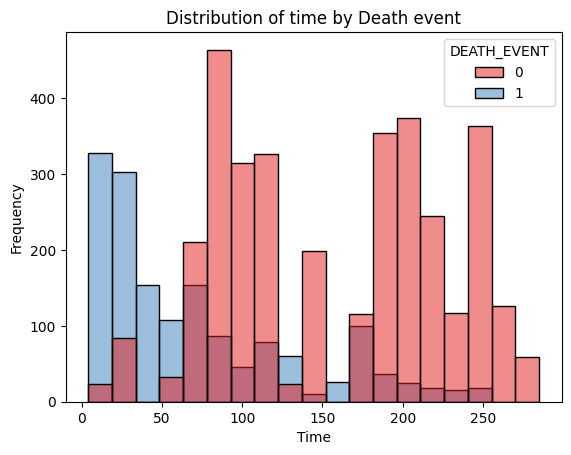

In [46]:
sns.histplot(data = df, x = 'time', hue='DEATH_EVENT', palette='Set1', kde=False)

plt.title('Distribution of time by Death event')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Time column is uniformaly distributed.
* It is evident that patients had more number of heart faliures those are in initial phase of followup period.

# Data Preprocessing

In [47]:
X = df.drop(labels = 'DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

**Train Test Split**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3750, 12)
(3750,)
(1250, 12)
(1250,)


**Scaling**

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)

In [51]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [52]:
X_train_scaled.shape

(3750, 12)

**Since the data requires no cleaning, our primary concern is handling outliers. However, removing them could lead to data loss, which is undesirable given the limited dataset size. Consequently, we opt for models robust to outliers to ensure accurate predictions without compromising valuable data.**

# Model Building

In [53]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [54]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))
    print('-' * 40)

Logistic Regression Accuracy: 84.64%
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       881
           1       0.75      0.73      0.74       369

    accuracy                           0.85      1250
   macro avg       0.82      0.81      0.81      1250
weighted avg       0.85      0.85      0.85      1250

Confusion Matrix:
 [[790  91]
 [101 268]]
ROC AUC Score: 0.895124104476005
----------------------------------------
Decision Tree Accuracy: 98.32%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.97      0.98      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250

Confusion Matrix:
 [[869  12]
 [  9 360]]
ROC AUC Score: 0.9809805930068382
----------------------------------------
Support Vector Classifier Accuracy: 94.64%
  

**Among all the models tested, the Random Forest Classifier has the highest accuracy and ROC AUC score of 0.99 and test accuracy of 99.04%**